# Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Import Data
path = r'C:\Users\Samantha Ramos\Desktop\Restaurant Rating Analysis'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'inspections_cleaned.csv'), index_col = False)

# Correlation Matrix Heatmap

In [8]:
df.head()

,Unnamed: 0,NAME,BORO,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude
0,0,CROWN FRIED CHICKEN,Brooklyn,11216.0,Chicken,1/3/2023,Violations were cited in the following area(s).,10B,Anti-siphonage or back-flow prevention device ...,Not Critical,29.0,C,2023-01-03,2/5/2024,Cycle Inspection / Re-inspection,40.670640,-73.950440
1,1,BAGEL BOB,Brooklyn,11234.0,Bagels/Pretzels,1/3/2023,Violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,Not Critical,26.0,NaN,NaN,2/5/2024,Pre-permit (Operational) / Initial Inspection,40.618342,-73.932203
2,2,MIZNON,Manhattan,10011.0,Mediterranean,1/3/2023,Violations were cited in the following area(s).,10B,Anti-siphonage or back-flow prevention device ...,Not Critical,12.0,A,2023-01-03,2/5/2024,Cycle Inspection / Re-inspection,40.741869,-74.004713
3,3,I AM KIMCHI,Queens,11358.0,Korean,1/3/2023,Violations were cited in the following area(s).,05D,No hand washing facility in or adjacent to toi...,Critical,26.0,NaN,NaN,2/5/2024,Pre-permit (Operational) / Initial Inspection,40.755734,-73.804625
4,4,THE MONKEY ROOM,Manhattan,10033.0,American,1/3/2023,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,Not Critical,9.0,A,2023-01-03,2/5/2024,Cycle Inspection / Initial Inspection,40.854623,-73.937051


In [18]:
# Create a subset excluding the \"Date\" and \"No\" columns
sub = df[['ZIPCODE','SCORE']]

In [24]:
#find the correlation between zipcode and score
sub.corr()

,ZIPCODE,SCORE
ZIPCODE,1.0000,0.0453
SCORE,0.0453,1.0000


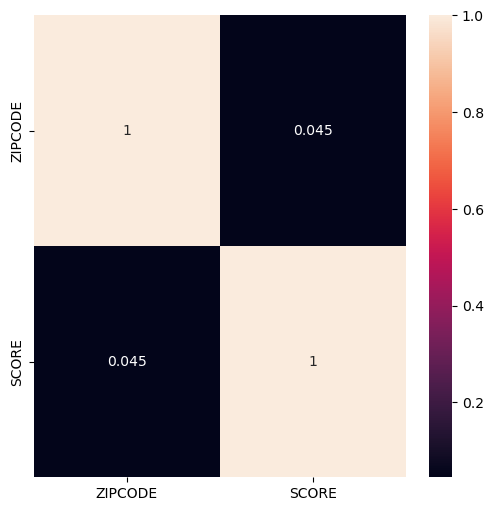

In [23]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(6,6))
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap

### Zip codes and inspection scores have a correlation value of 0.045, which does not signify a strong linear relationship

# Scatterplot

C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


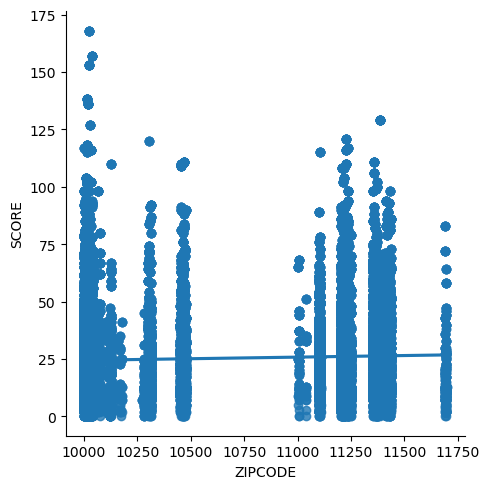

In [26]:
# Create a scatterplot for the \"ZIPCODE\" and \"SCORE\" columns in seaborn
sns.lmplot(x = 'ZIPCODE', y = 'SCORE', data = df)

### A lower score signifies fewer violations. Areas with the highest scores are concentrated between zip codes 10000 and 10125 which are located in Manhattan. Next steps would be to focus on which areas of Manhattan have the highest scores and why.

# Pair Plot

C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

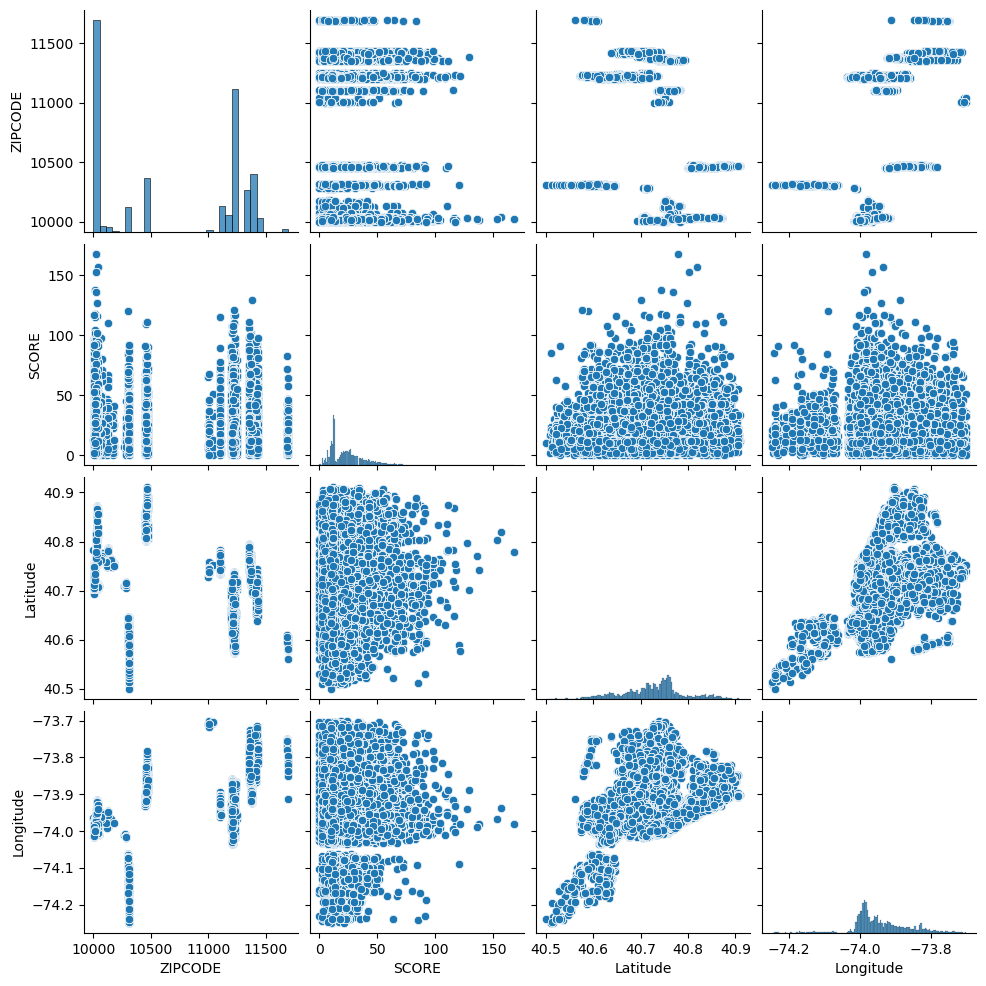

In [29]:
# Create a pair plot
g = sns.pairplot(df)

### I would like to further explore the relationship between zip code and score to find out if certain neighborhoods are more likely to have higher/lower scores.

# Categorical Plot

C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CUISINE DESCRIPTION', ylabel='Count'>

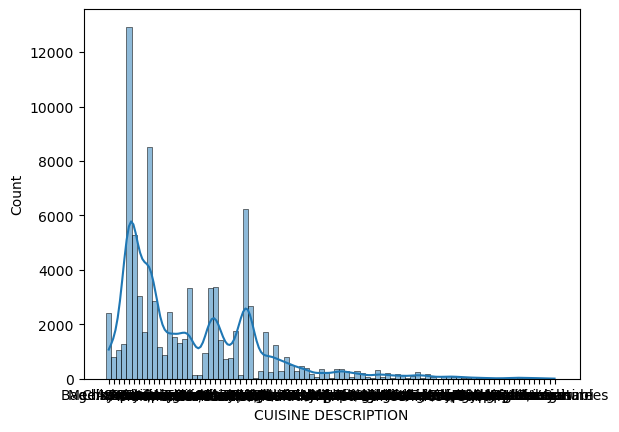

In [30]:
# Use a histogram to visualize the distribution of the variables.
# This way, you can determine sensible categories for the cuisine descriptions.
# You don't want to end up with too few observations in any one of the categories.
# The argument \"kde\" add a line that encompasses the distribution
sns.histplot(df['CUISINE DESCRIPTION'], bins = 20, kde = True)

In [31]:
df['CUISINE DESCRIPTION'].value_counts()

CUISINE DESCRIPTION
American                    12931
Chinese                      8514
Coffee/Tea                   6218
Pizza                        5279
Bakery Products/Desserts     3384
                            ...  
Southwestern                    6
Czech                           2
Basque                          2
Haute Cuisine                   2
Chimichurri                     2
Name: count, Length: 89, dtype: int64

In [36]:
df.loc[df['SCORE'] < 14, 'NEW GRADE'] = 'A'

In [38]:
df.loc[(df['SCORE'] >= 14) & (df['SCORE'] < 28), 'NEW GRADE'] = 'B'

In [42]:
df.loc[df['SCORE'] > 28, 'NEW GRADE'] = 'C'

In [43]:
df['NEW GRADE'].value_counts(dropna = False)

NEW GRADE
A    29907
C    26887
B    22583
n     5363
Name: count, dtype: int64

In [52]:
df.loc[df['CUISINE DESCRIPTION'] == 'American', 'CUISINE'] = 'American'

In [53]:
df.loc[df['CUISINE DESCRIPTION'] == 'Cajun', 'CUISINE'] = 'American'

In [54]:
df.loc[df['CUISINE DESCRIPTION'] == 'Californian', 'CUISINE'] = 'American'

In [55]:
df.loc[df['CUISINE DESCRIPTION'] == 'Chicken', 'CUISINE'] = 'American'

In [56]:
df.loc[df['CUISINE DESCRIPTION'] == 'Coffee/Tea', 'CUISINE'] = 'American'

In [58]:
df.loc[df['CUISINE DESCRIPTION'] == 'Continental', 'CUISINE'] = 'American'

In [57]:
df.loc[df['CUISINE DESCRIPTION'] == 'Donuts', 'CUISINE'] = 'American'

In [59]:
df.loc[df['CUISINE DESCRIPTION'] == 'Frozen Desserts', 'CUISINE'] = 'American'

In [60]:
df.loc[df['CUISINE DESCRIPTION'] == 'Fruits/Vegetables', 'CUISINE'] = 'American'

In [61]:
df.loc[df['CUISINE DESCRIPTION'] == 'Hamburgers', 'CUISINE'] = 'American'

In [62]:
df.loc[df['CUISINE DESCRIPTION'] == 'Haute Cuisine', 'CUISINE'] = 'American'

In [63]:
df.loc[df['CUISINE DESCRIPTION'] == 'Hawaiian', 'CUISINE'] = 'American'

In [64]:
df.loc[df['CUISINE DESCRIPTION'] == 'Hotdogs', 'CUISINE'] = 'American'

In [65]:
df.loc[df['CUISINE DESCRIPTION'] == 'Hotdogs/Pretzels', 'CUISINE'] = 'American'

In [66]:
df.loc[df['CUISINE DESCRIPTION'] == 'Juice, Smoothies, Fruit Salads', 'CUISINE'] = 'American'

In [67]:
df.loc[df['CUISINE DESCRIPTION'] == 'Jewish/Kosher', 'CUISINE'] = 'American'

In [68]:
df.loc[df['CUISINE DESCRIPTION'] == 'New American', 'CUISINE'] = 'American'

In [69]:
df.loc[df['CUISINE DESCRIPTION'] == 'Nuts/Confectionary', 'CUISINE'] = 'American'

In [70]:
df.loc[df['CUISINE DESCRIPTION'] == 'Pancakes/Waffles', 'CUISINE'] = 'American'

In [71]:
df.loc[df['CUISINE DESCRIPTION'] == 'Pizza', 'CUISINE'] = 'American'

In [72]:
df.loc[df['CUISINE DESCRIPTION'] == 'Salads', 'CUISINE'] = 'American'

In [73]:
df.loc[df['CUISINE DESCRIPTION'] == 'Sandwiches', 'CUISINE'] = 'American'

In [74]:
df.loc[df['CUISINE DESCRIPTION'] == 'Sandwiches/Salads/Mixed Buffet', 'CUISINE'] = 'American'

In [75]:
df.loc[df['CUISINE DESCRIPTION'] == 'Seafood', 'CUISINE'] = 'American'

In [76]:
df.loc[df['CUISINE DESCRIPTION'] == 'Soul Food', 'CUISINE'] = 'American'

In [77]:
df.loc[df['CUISINE DESCRIPTION'] == 'Soups', 'CUISINE'] = 'American'

In [78]:
df.loc[df['CUISINE DESCRIPTION'] == 'Soups/Salads/Sandwiches', 'CUISINE'] = 'American'

In [79]:
df.loc[df['CUISINE DESCRIPTION'] == 'Steakhouse', 'CUISINE'] = 'American'

In [80]:
df.loc[df['CUISINE DESCRIPTION'] == 'Vegan', 'CUISINE'] = 'American'

In [81]:
df.loc[df['CUISINE DESCRIPTION'] == 'Vegetarian', 'CUISINE'] = 'American'

In [82]:
df.loc[df['CUISINE DESCRIPTION'] == 'Bagels/Pretzels', 'CUISINE'] = 'American'

In [83]:
df.loc[df['CUISINE DESCRIPTION'] == 'Barbecue', 'CUISINE'] = 'American'

In [84]:
df.loc[df['CUISINE DESCRIPTION'] == 'Bakery Products/Desserts', 'CUISINE'] = 'American'

In [136]:
df.loc[df['CUISINE DESCRIPTION'] == 'Southwestern', 'CUISINE'] = 'American'

In [85]:
df.loc[df['CUISINE DESCRIPTION'] == 'Brazilian', 'CUISINE'] = 'Caribbean/Hispanic'

In [86]:
df.loc[df['CUISINE DESCRIPTION'] == 'Caribbean', 'CUISINE'] = 'Caribbean/Hispanic'

In [87]:
df.loc[df['CUISINE DESCRIPTION'] == 'Chilean', 'CUISINE'] = 'Caribbean/Hispanic'

In [ ]:
df.loc[df['CUISINE DESCRIPTION'] == 'Caribbean', 'CUISINE'] = 'Caribbean/Hispanic'

In [88]:
df.loc[df['CUISINE DESCRIPTION'] == 'Chimichurri', 'CUISINE'] = 'Caribbean/Hispanic'

In [89]:
df.loc[df['CUISINE DESCRIPTION'] == 'Creole', 'CUISINE'] = 'Caribbean/Hispanic'

In [90]:
df.loc[df['CUISINE DESCRIPTION'] == 'Creole/Cajun', 'CUISINE'] = 'Caribbean/Hispanic'

In [91]:
df.loc[df['CUISINE DESCRIPTION'] == 'Latin American', 'CUISINE'] = 'Caribbean/Hispanic'

In [92]:
df.loc[df['CUISINE DESCRIPTION'] == 'Mexican', 'CUISINE'] = 'Caribbean/Hispanic'

In [93]:
df.loc[df['CUISINE DESCRIPTION'] == 'Peruvian', 'CUISINE'] = 'Caribbean/Hispanic'

In [94]:
df.loc[df['CUISINE DESCRIPTION'] == 'Spanish', 'CUISINE'] = 'Caribbean/Hispanic'

In [95]:
df.loc[df['CUISINE DESCRIPTION'] == 'Tapas', 'CUISINE'] = 'Caribbean/Hispanic'

In [96]:
df.loc[df['CUISINE DESCRIPTION'] == 'Tex-Mex', 'CUISINE'] = 'Caribbean/Hispanic'

In [97]:
df.loc[df['CUISINE DESCRIPTION'] == 'Asian/Asian Fusion', 'CUISINE'] = 'Asian'

In [98]:
df.loc[df['CUISINE DESCRIPTION'] == 'Chinese', 'CUISINE'] = 'Asian'

In [99]:
df.loc[df['CUISINE DESCRIPTION'] == 'Chinese/Cuban', 'CUISINE'] = 'Asian'

In [100]:
df.loc[df['CUISINE DESCRIPTION'] == 'Chinese/Japanese', 'CUISINE'] = 'Asian'

In [101]:
df.loc[df['CUISINE DESCRIPTION'] == 'Filipino', 'CUISINE'] = 'Asian'

In [102]:
df.loc[df['CUISINE DESCRIPTION'] == 'Korean', 'CUISINE'] = 'Asian'

In [103]:
df.loc[df['CUISINE DESCRIPTION'] == 'Japanese', 'CUISINE'] = 'Asian'

In [104]:
df.loc[df['CUISINE DESCRIPTION'] == 'Thai', 'CUISINE'] = 'Asian'

In [106]:
df.loc[df['CUISINE DESCRIPTION'] == 'Armenian', 'CUISINE'] = 'Southeast Asian'

In [105]:
df.loc[df['CUISINE DESCRIPTION'] == 'Afghan', 'CUISINE'] = 'Southeast Asian'

In [107]:
df.loc[df['CUISINE DESCRIPTION'] == 'Bangladeshi', 'CUISINE'] = 'Southeast Asian'

In [108]:
df.loc[df['CUISINE DESCRIPTION'] == 'Indian', 'CUISINE'] = 'Southeast Asian'

In [109]:
df.loc[df['CUISINE DESCRIPTION'] == 'Indonesian', 'CUISINE'] = 'Southeast Asian'

In [110]:
df.loc[df['CUISINE DESCRIPTION'] == 'Iranian', 'CUISINE'] = 'Southeast Asian'

In [111]:
df.loc[df['CUISINE DESCRIPTION'] == 'Lebanese', 'CUISINE'] = 'Southeast Asian'

In [112]:
df.loc[df['CUISINE DESCRIPTION'] == 'Middle Eastern', 'CUISINE'] = 'Southeast Asian'

In [113]:
df.loc[df['CUISINE DESCRIPTION'] == 'Pakistani', 'CUISINE'] = 'Southeast Asian'

In [114]:
df.loc[df['CUISINE DESCRIPTION'] == 'Southeast Asian', 'CUISINE'] = 'Southeast Asian'

In [115]:
df.loc[df['CUISINE DESCRIPTION'] == 'Turkish', 'CUISINE'] = 'Southeast Asian'

In [116]:
df.loc[df['CUISINE DESCRIPTION'] == 'Moroccan', 'CUISINE'] = 'African'

In [117]:
df.loc[df['CUISINE DESCRIPTION'] == 'Ethiopian', 'CUISINE'] = 'African'

In [118]:
df.loc[df['CUISINE DESCRIPTION'] == 'Egyptian', 'CUISINE'] = 'African'

In [119]:
df.loc[df['CUISINE DESCRIPTION'] == 'African', 'CUISINE'] = 'African'

In [120]:
df.loc[df['CUISINE DESCRIPTION'] == 'Australian', 'CUISINE'] = 'Australian'

In [121]:
df.loc[df['CUISINE DESCRIPTION'] == 'Basque', 'CUISINE'] = 'European'

In [122]:
df.loc[df['CUISINE DESCRIPTION'] == 'Czech', 'CUISINE'] = 'European'

In [123]:
df.loc[df['CUISINE DESCRIPTION'] == 'Eastern European', 'CUISINE'] = 'European'

In [124]:
df.loc[df['CUISINE DESCRIPTION'] == 'English', 'CUISINE'] = 'European'

In [125]:
df.loc[df['CUISINE DESCRIPTION'] == 'French', 'CUISINE'] = 'European'

In [126]:
df.loc[df['CUISINE DESCRIPTION'] == 'German', 'CUISINE'] = 'European'

In [127]:
df.loc[df['CUISINE DESCRIPTION'] == 'Greek', 'CUISINE'] = 'European'

In [128]:
df.loc[df['CUISINE DESCRIPTION'] == 'Irish', 'CUISINE'] = 'European'

In [129]:
df.loc[df['CUISINE DESCRIPTION'] == 'Italian', 'CUISINE'] = 'European'

In [130]:
df.loc[df['CUISINE DESCRIPTION'] == 'Mediterranean', 'CUISINE'] = 'European'

In [131]:
df.loc[df['CUISINE DESCRIPTION'] == 'New French', 'CUISINE'] = 'European'

In [132]:
df.loc[df['CUISINE DESCRIPTION'] == 'Polish', 'CUISINE'] = 'European'

In [133]:
df.loc[df['CUISINE DESCRIPTION'] == 'Portuguese', 'CUISINE'] = 'European'

In [134]:
df.loc[df['CUISINE DESCRIPTION'] == 'Russian', 'CUISINE'] = 'European'

In [135]:
df.loc[df['CUISINE DESCRIPTION'] == 'Scandinavian', 'CUISINE'] = 'European'

In [137]:
df.loc[df['CUISINE DESCRIPTION'] == 'Bottled Beverages', 'CUISINE'] = 'Other'

In [138]:
df.loc[df['CUISINE DESCRIPTION'] == 'Fusion', 'CUISINE'] = 'Other'

In [139]:
df.loc[df['CUISINE DESCRIPTION'] == 'Not Listed/Not Applicable', 'CUISINE'] = 'Other'

In [140]:
df.loc[df['CUISINE DESCRIPTION'] == 'Other', 'CUISINE'] = 'Other'

In [141]:
df['CUISINE'].value_counts(dropna = False)

CUISINE
American              42784
Asian                 16009
Caribbean/Hispanic    13614
European               6045
Southeast Asian        3540
Other                  2259
African                 414
Australian               75
Name: count, dtype: int64

C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Samantha Ramos\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


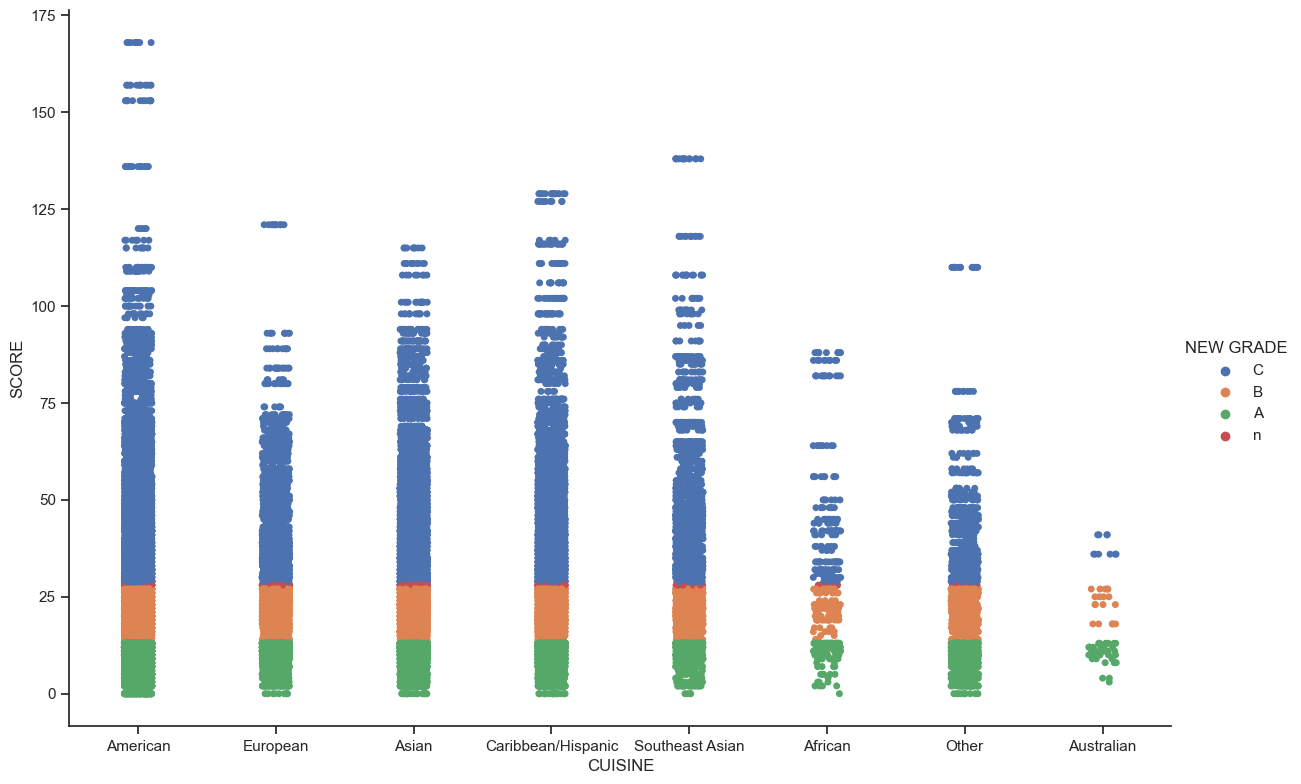

In [145]:
# Create a categorical plot in seaborn using the new grade categories created above
sns.set(style= "ticks")
g = sns.catplot(x="CUISINE", y="SCORE", hue="NEW GRADE", data=df, height=8, aspect=1.5)

In [147]:
#save chart
g.savefig("Grades by Cuisine.png")

### The distribution of scores is similar for all cuisines, but the highest scores (worst ratings) are found in the American cuisine category.

## New Questions:
### What are the most common violations in American cuisine inspections? Are they the same in all neighborhoods?


## Hypothesis:
### Scores of American cuisine are greater than scores of other cuisines

In [149]:
#export cleaned df as csv file
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'inspections_vis.csv'))